# Fechas en R

Existen dos objetos para almacenar fechas en R.

* Posixct es recubrimiento sobre un timestamp en segundos.
* Posixlt es una lista de objetos que contiene la información de la fecha

In [4]:
d1<-as.POSIXct("2018-10-5 15:40")
d2<-as.POSIXct("5/10/2018 17:33",format="%d/%m/%Y")

d1
d2

[1] "2018-10-05 15:40:00 UTC"

[1] "2018-10-05 UTC"

In [6]:
str(d1)
unclass(d1)

 POSIXct[1:1], format: "2018-10-05 15:40:00"


[1] 1538754000
attr(,"tzone")
[1] ""

In [7]:
d3<-as.POSIXlt("2018-4-5")
d3

[1] "2018-04-05 UTC"

In [9]:
str(d3)
unclass(d3)

 POSIXlt[1:1], format: "2018-04-05"


$sec
[1] 0

$min
[1] 0

$hour
[1] 0

$mday
[1] 5

$mon
[1] 3

$year
[1] 118

$wday
[1] 4

$yday
[1] 94

$isdst
[1] 0

$zone
[1] "UTC"

$gmtoff
[1] NA

# Series temporales

Hablaremos de los objetos xts y los zoo que son de los que hereda.

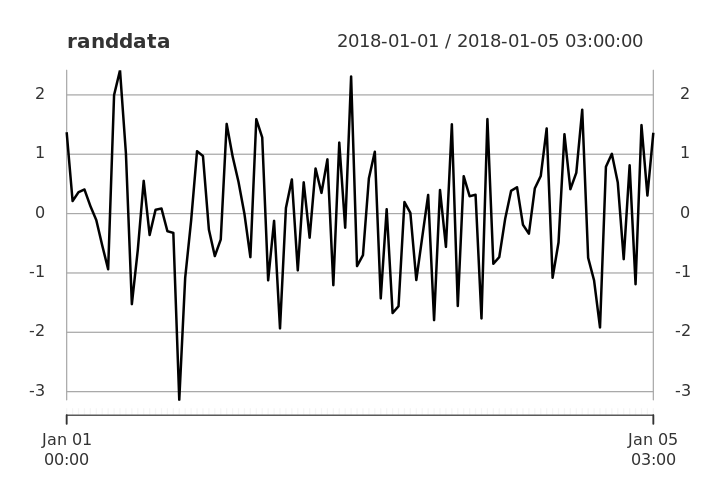

In [34]:
options(repr.plot.height=4,repr.plot.width=6)
N<-100
data <- rnorm(N)
dates <- seq(as.POSIXct("2018-01-01"), length = N, by = "hour")

randdata <- xts(x = data, order.by = dates)
plot(randdata)

Primero creamos un objeto xts a partir del valor de las acciones de Apple

In [14]:
suppressWarnings(require("quantmod"))
start <- as.Date("2007-01-01")
end <- as.Date("2018-01-01")
AAPL<-getSymbols("AAPL", src = "yahoo", from = start, to = end,auto.assign = F)

In [15]:
class(AAPL)

[1] "xts" "zoo"

Accedemos a la fecha mediante la función *index()*

In [52]:
index(AAPL)[1:3]

[1] "2007-01-03" "2007-01-04" "2007-01-05"

Al contenido, sin fecha, se accede con *coredata()*

In [54]:
str(coredata(AAPL))

 num [1:2769, 1:6] 12.3 12 12.3 12.3 12.3 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:6] "AAPL.Open" "AAPL.High" "AAPL.Low" "AAPL.Close" ...


## Queries sobre fechas

Podemos usar el formato  ISO-8601 para hacer queries sobre fechas:

In [23]:
AAPL["20170109"]

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2017-01-09    117.95    119.43   117.94     118.99    33561900      116.6313

In [22]:
AAPL["20170101/20170110"]

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2017-01-03    115.80    116.33   114.76     116.15    28781900      113.8476
2017-01-04    115.85    116.51   115.75     116.02    21118100      113.7202
2017-01-05    115.92    116.86   115.81     116.61    22193600      114.2985
2017-01-06    116.78    118.16   116.47     117.91    31751900      115.5727
2017-01-09    117.95    119.43   117.94     118.99    33561900      116.6313
2017-01-10    118.77    119.38   118.30     119.11    24462100      116.7489

In [36]:
randdata["2018-01-01T08:00/2018-01-01T10:00"]

                        [,1]
2018-01-01 08:00:00 1.997208
2018-01-01 09:00:00 2.414453
2018-01-01 10:00:00 1.012451

# Funciones 

Media, mediana movil

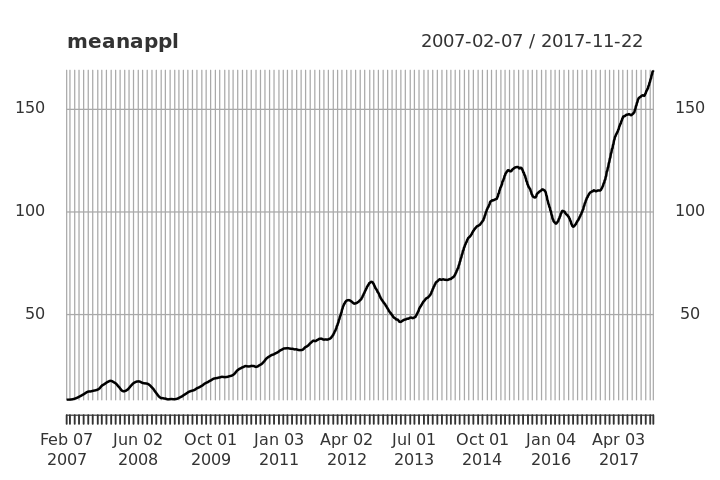

In [78]:
appl<-AAPL$AAPL.Adjusted
meanappl<-rollmean(appl,k = 50)
plot(meanappl)


# Algorimto ARIMA

In [37]:
dir.create(file.path("/home/vagrant/R/x86_64-pc-linux-gnu-library/3.2"),recursive = T)
install.packages(c('forecast'), lib="~/R/x86_64-pc-linux-gnu-library/3.2", 
                 repos='https://cran.rstudio.com/',verbose=F)

Warning message in dir.create(file.path("/home/vagrant/R/x86_64-pc-linux-gnu-library/3.2"), :
“'/home/vagrant/R/x86_64-pc-linux-gnu-library/3.2' already exists”also installing the dependencies ‘quadprog’, ‘tseries’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘RcppArmadillo’




The downloaded source packages are in
	‘/tmp/RtmpyTEaid/downloaded_packages’


In [38]:
library("forecast",lib.loc = "/home/vagrant/R/x86_64-pc-linux-gnu-library/3.2")

In [44]:
str(AAPL$AAPL.Adjusted)

An ‘xts’ object on 2007-01-03/2017-12-29 containing:
  Data: num [1:2769, 1] 8.1 8.28 8.23 8.27 8.95 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "AAPL.Adjusted"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
List of 2
 $ src    : chr "yahoo"
 $ updated: POSIXct[1:1], format: "2018-02-27 18:17:42"


In [39]:
model <- auto.arima(AAPL$AAPL.Adjusted)

In [40]:
model

Series: AAPL$AAPL.Adjusted 
ARIMA(0,1,0) with drift 

Coefficients:
       drift
      0.0580
s.e.  0.0204

sigma^2 estimated as 1.152:  log likelihood=-4122.56
AIC=8249.12   AICc=8249.13   BIC=8260.97

In [41]:
?auto.arima

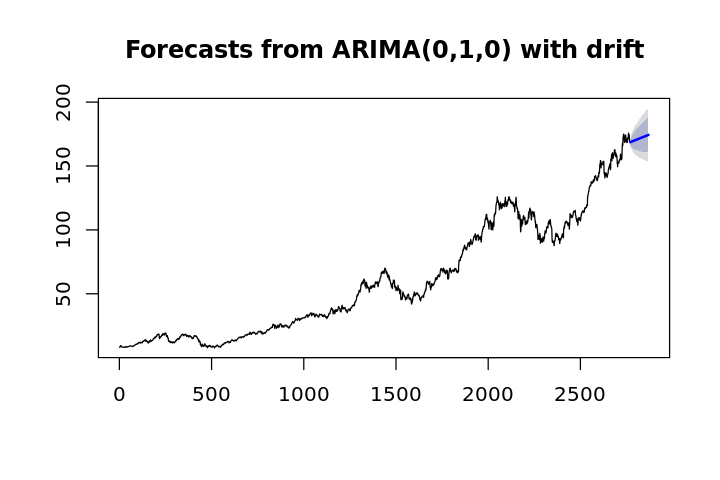

In [43]:
plot(forecast(model,h=100))

Las 10 próximas prediciones del modelo son:

In [50]:
forecast(model,h=10)

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2770       168.6008 167.2255 169.9761 166.4974 170.7041
2771       168.6588 166.7138 170.6037 165.6842 171.6333
2772       168.7167 166.3346 171.0988 165.0736 172.3598
2773       168.7747 166.0241 171.5253 164.5680 172.9814
2774       168.8326 165.7574 171.9079 164.1294 173.5359
2775       168.8906 165.5218 172.2594 163.7385 174.0427
2776       168.9486 165.3098 172.5873 163.3836 174.5135
2777       169.0065 165.1166 172.8965 163.0573 174.9557
2778       169.0645 164.9386 173.1904 162.7544 175.3745
2779       169.1225 164.7733 173.4716 162.4711 175.7738